In [50]:
import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from wordcloud import WordCloud
import nltk
nltk.data.path.append(r"c:\Users\Work\Desktop\projects\project2\project2-movie-env\Lib\site-packages\nltk")
from nltk.corpus import stopwords



#Options

In [51]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", lambda x: f"{x :.2f}")
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
stop_words = set(stopwords.words('french'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

# Connect to the database and create df



In [53]:
con = duckdb.connect('movies.db')

In [54]:
movies = con.table('movies').df()
con.close()

In [55]:
movies.head()

,backdrop_path,id,imdb_id,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,vote_average,vote_count,genres,actors,actors_id,directors,directors_id,video_name,video_key,keywords,production_company
0,/qYHM1QaR86eQeKX8qi8kFtqFAGd.jpg,655363,tt9834506,Post Mortem,"Hongrie, 1919. Miraculeusement revenu du front...",25.63,/4X47HT16UXf96cn1pI2hq31tX31.jpg,2020-10-28,115,Released,Immortalisez vos plus grandes peurs.,Post Mortem,6.70,193,"[Horreur, Mystère, Thriller]","[Viktor Klem, Fruzsina Hais, Judit Schell, Ang...","[1739471, 2481242, 125682, 131215, 1499191, 89...",[Péter Bergendy],[930499],[POST MORTEM Bande Annonce VF (2022)],[pv4NBtvy4zw],[],[Szupermodern Stúdió]
1,/dhr0q4eiRr8ltqPig32TwhPRdaD.jpg,17,tt0411267,The Dark,En débarquant dans cette contrée isolée du pay...,27.69,/ebzumprgCpfFUZOTJNZ407FA9IH.jpg,2005-09-28,87,Released,,The Dark,5.80,256,"[Horreur, Thriller, Mystère]","[Maria Bello, Sean Bean, Abigail Stone, Richar...","[49, 48, 55, 51, 54, 56]",[John Fawcett],[43],[],[],"[sea, wales, child abuse, shepherd, adolescenc...","[Constantin Film, Impact Pictures, Isle of Man..."
2,/bQ8fRUaitJvi54O2lUT6Ta7FVHK.jpg,25,tt0418763,Jarhead,"Été 1990. Anthony Swofford, fils et petit‐fils...",121.75,/rpPa7dGWnuldRGyLtr4eT2n38jH.jpg,2005-11-04,123,Released,"La guerre, c’est l’enfer. L’attente, c’est pire.",Jarhead : La Fin de l'innocence,6.65,2749,"[Drame, Guerre]","[Jake Gyllenhaal, Jamie Foxx, Peter Sarsgaard,...","[131, 134, 133, 132, 2955, 10964]",[Sam Mendes],[39],[Jarhead: La fin de l'innocence (VF) - Bande A...,"[3wZjh-2PbIM, peoCGkXCCp4]","[california, gulf war, saudi arabia, petrol, m...","[Red Wagon Entertainment, Neal Street Producti..."
3,/pR12U3MPxq6aeHHd4sQOml72SSH.jpg,98339,tt1867093,The Samaritan,"Foley, un ancien arnaqueur, tente de changer d...",11.28,/5Lvo5OjSZmirakT8B7xxEnn1h1F.jpg,2012-03-02,90,Released,,Le Samaritain,5.40,197,[Thriller],"[Samuel L. Jackson, Luke Kirby, Ruth Negga, To...","[2231, 7002, 17018, 207, 52703, 6575]",[David Weaver],[545229],[],[],"[prison, drug use, revenge, incest, grifter, p...","[H2O Motion Pictures, 2262730 Ontario, Middle ..."
4,/8ln5VUVk7gnNGIb2VNgw8nICDVt.jpg,35,tt0462538,The Simpsons Movie,Lorsque Homer pollue gravement le lac de Sprin...,80.96,/9Vz5sgIG10YNka14cv11dO5CfMF.jpg,2007-07-25,88,Released,La plus grande aventure familiale de tous les ...,"Les Simpson, le film",7.00,7713,"[Animation, Comédie, Familial]","[Dan Castellaneta, Julie Kavner, Nancy Cartwri...","[198, 199, 200, 5586, 5587, 6008]",[David Silverman],[197],"[LES SIMPSON - LE FILM (bande-annonce), Interv...","[8arbBxezySc, Ji32yfWuROQ]","[garbage, pollution, quarantine, environmental...","[Gracie Films, 20th Century Fox]"


# Start EDA

In [56]:
movies.describe()



,id,popularity,release_date,runtime,vote_average,vote_count
count,8666.00,8666.00,8666,8666.00,8666.00,8666.00
mean,314351.13,46.47,2015-01-01 16:35:50.196169,105.15,6.53,1504.52
min,17.00,0.60,2004-05-07 00:00:00,0.00,5.00,150.00
25%,47905.25,19.34,2010-10-22 00:00:00,93.00,6.00,245.00
50%,291082.50,29.97,2015-07-24 00:00:00,102.00,6.50,477.00
75%,504232.75,51.21,2019-03-29 00:00:00,114.00,7.06,1351.75
max,1226841.00,2129.30,2024-04-19 00:00:00,247.00,9.10,35645.00
std,273061.02,69.74,NaN,18.25,0.72,2847.00


In [57]:
movies.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   backdrop_path       8661 non-null   object        
 1   id                  8666 non-null   int32         
 2   imdb_id             8665 non-null   object        
 3   original_title      8666 non-null   object        
 4   overview            8666 non-null   object        
 5   popularity          8666 non-null   float64       
 6   poster_path         8666 non-null   object        
 7   release_date        8666 non-null   datetime64[us]
 8   runtime             8666 non-null   int32         
 9   status              8666 non-null   object        
 10  tagline             8666 non-null   object        
 11  title               8666 non-null   object        
 12  vote_average        8666 non-null   float64       
 13  vote_count          8666 non-null   int32       

In [58]:
movies['vote_count'].describe()




count    8666.00
mean     1504.52
std      2847.00
min       150.00
25%       245.00
50%       477.00
75%      1351.75
max     35645.00
Name: vote_count, dtype: float64

In [59]:
movies['vote_average'].describe()



count   8666.00
mean       6.53
std        0.72
min        5.00
25%        6.00
50%        6.50
75%        7.06
max        9.10
Name: vote_average, dtype: float64

In [60]:
c = movies['vote_average'].mean()
c

6.531224324948073

In [61]:
#m= movies['vote_count'].quantile(0.5)
m = 150

In [62]:
def weighted_rating(df: pd.DataFrame,m: int=m, c: float=c)->float:
    v = df['vote_count']
    r = df['vote_average']
    return (v / (v+m)) * r + (m / (v+m)) * c



In [63]:
movies['imbd_score'] = movies.apply(weighted_rating, axis=1)

movies_sort_score = movies.sort_values(by='imbd_score', ascending=False)
movies_sort_score[['title','imbd_score','popularity','vote_count','vote_average']].head(10)




,title,imbd_score,popularity,vote_count,vote_average
46,The Dark Knight : Le Chevalier noir,8.51,130.06,31857,8.52
1248,Parasite,8.49,113.31,17480,8.51
3406,Your Name.,8.47,96.68,10942,8.50
7328,Interstellar,8.39,408.34,34223,8.40
8097,Spider-Man : New Generation,8.38,144.37,14949,8.40
1301,Le Château ambulant,8.38,131.95,9408,8.41
7545,Inception,8.36,403.84,35645,8.37
4744,Whiplash,8.36,171.51,14577,8.38
3529,Spider-Man : Across the Spider-Verse,8.33,251.42,6206,8.37
5308,Silent Voice,8.31,59.60,3769,8.38


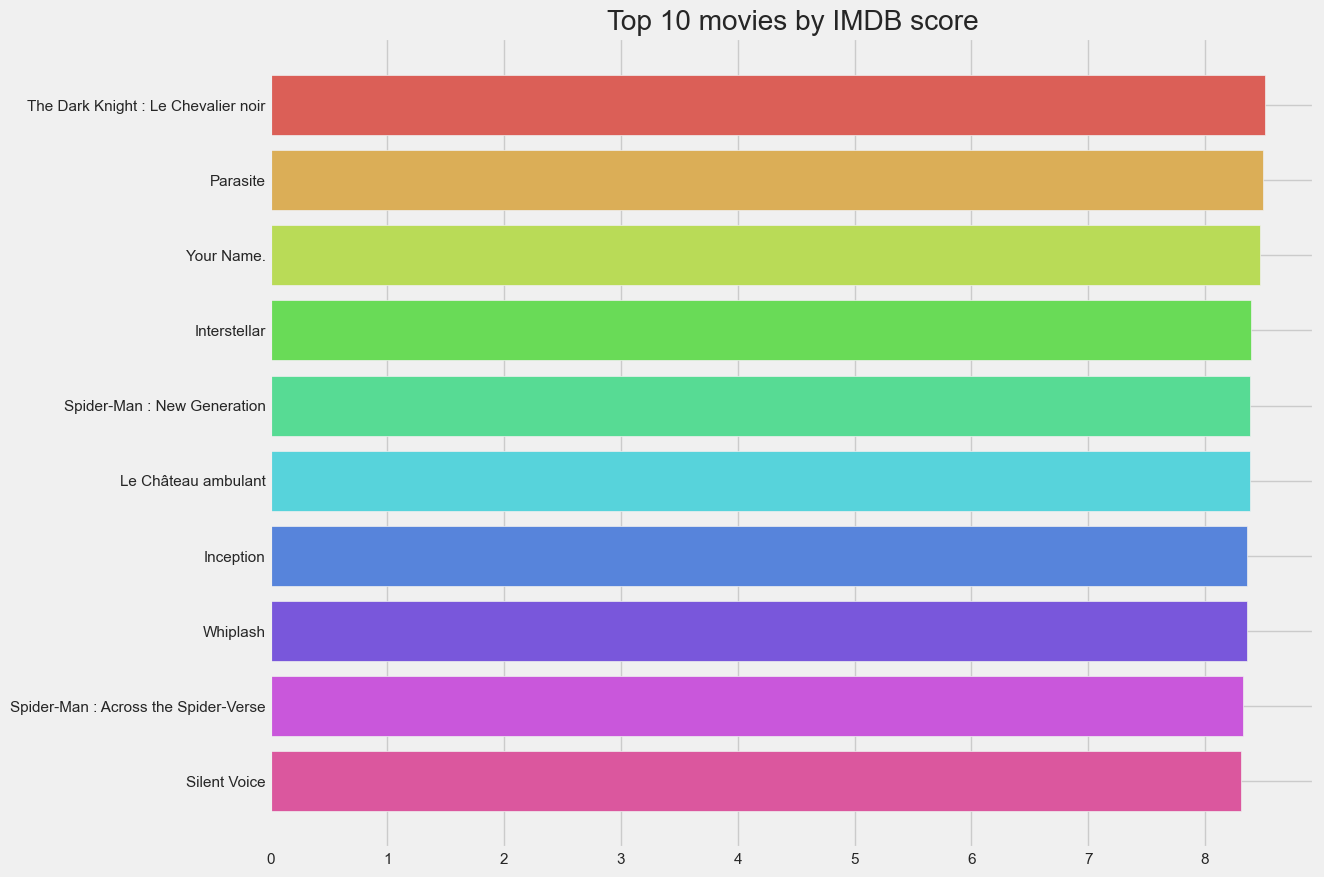

In [64]:
plt.subplots(figsize=(12,10))
plt.barh(movies_sort_score['title'].head(10),movies_sort_score['imbd_score'].head(10),color=sns.color_palette('hls',10))
plt.gca().invert_yaxis()
plt.title('Top 10 movies by IMDB score')
plt.show()



In [65]:
movies['imbd_score'].describe()



count   8666.00
mean       6.55
std        0.56
min        5.07
25%        6.14
50%        6.51
75%        6.92
max        8.51
Name: imbd_score, dtype: float64

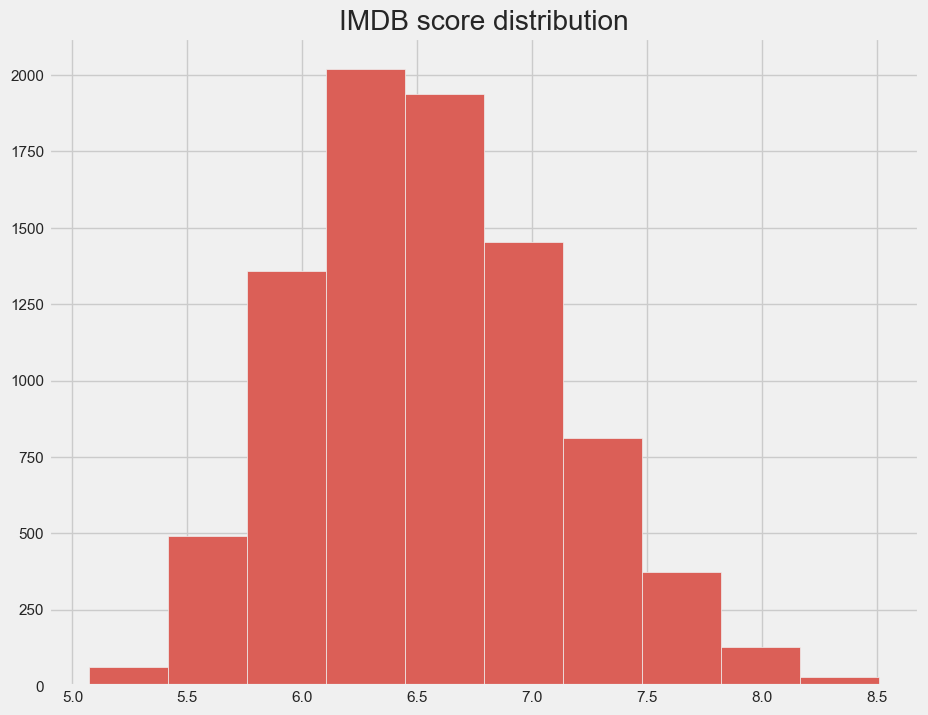

In [66]:
plt.subplots(figsize=(10,8))
plt.hist(movies['imbd_score'],bins=10,color=sns.color_palette('hls',1))
plt.title('IMDB score distribution')
plt.show()




In [67]:
movies.to_parquet('streamlit/data/movies.parquet')

# overview/tagline. trying out TF-IDF


In [68]:
#Define a TF-IDF Vectorizer Object. Remove all french stop words
tfidf = TfidfVectorizer(stop_words=list(stop_words), lowercase=True)



In [69]:
#add tagline to overview
movies['tagline'] = movies['tagline'].fillna('')
movies['description'] = movies['overview'] +' ' + movies['tagline']
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8666, 35108)

In [70]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [71]:
#Construct a reverse map of index and movie titles
index = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [72]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = index[title]
    #idx = movies.index[movies['title'] == title][0]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return (movies['title'].iloc[movie_indices],movies['id'].iloc[movie_indices])

In [73]:
movies2 = movies[['title','genres','actors','directors','keywords']]



# Genres columns

In [74]:
movies2['genres'] = movies2['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies2['genres'] = movies2['genres'].str.split(',')



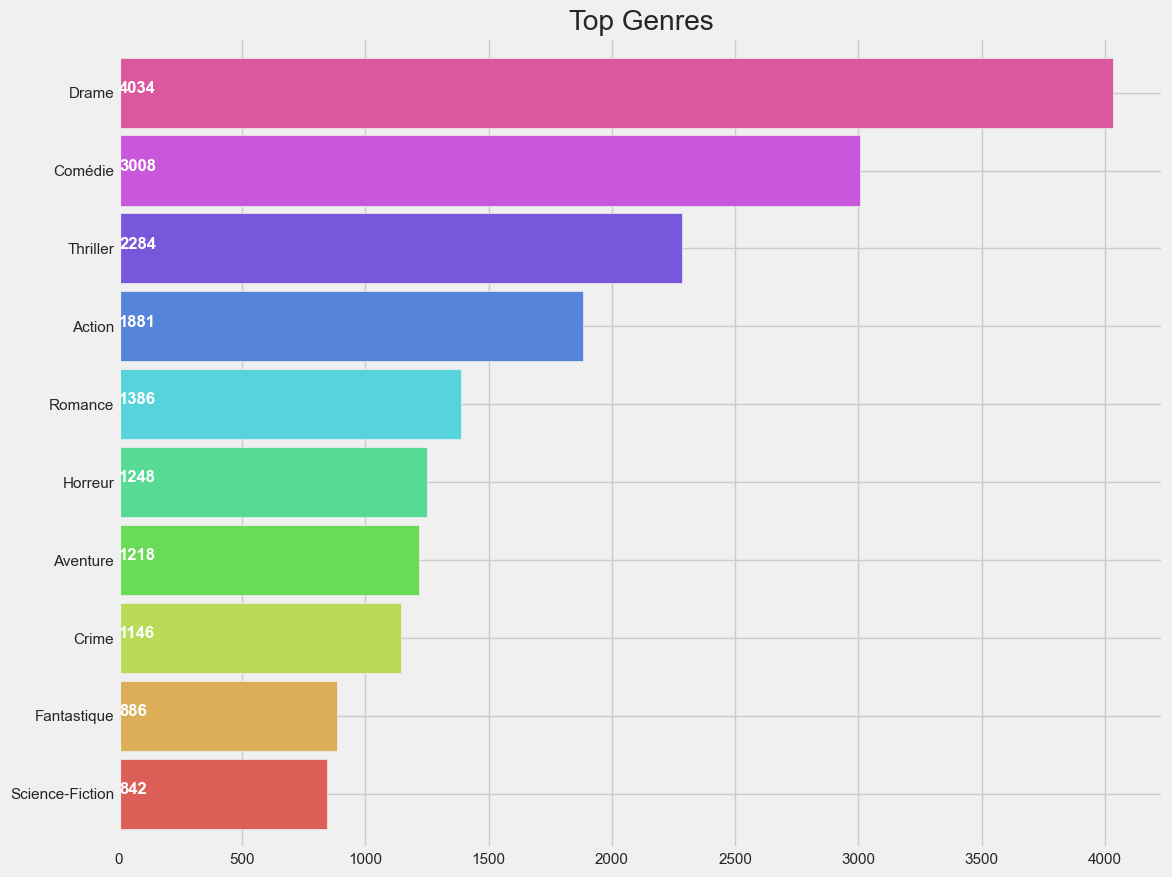

In [75]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies2['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(0.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

# Actors columns

In [76]:
movies2['actors'] = movies2['actors'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies2['actors'] = movies2['actors'].str.split(',')



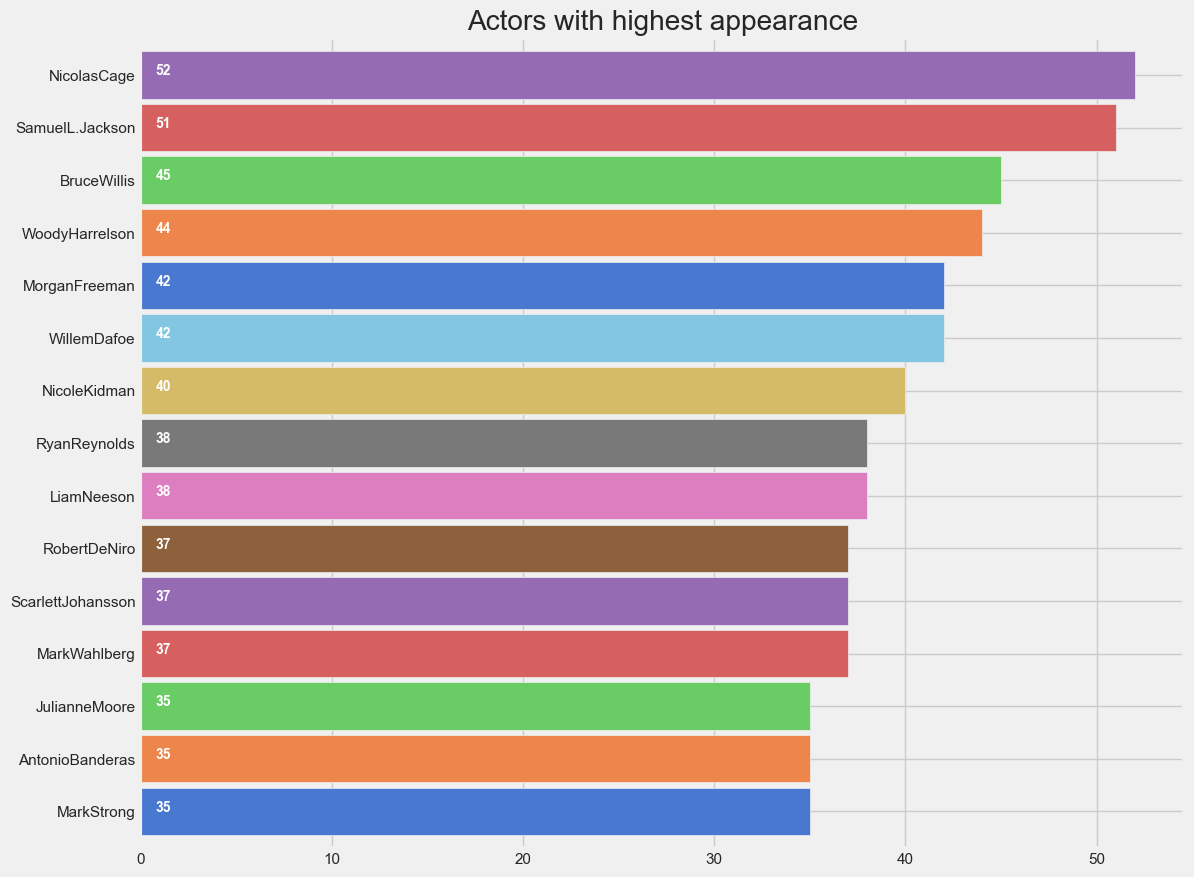

In [77]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies2['actors']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

# directors column

In [78]:
movies2['directors'] = movies2['directors'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies2['directors'] = movies2['directors'].str.split(',')



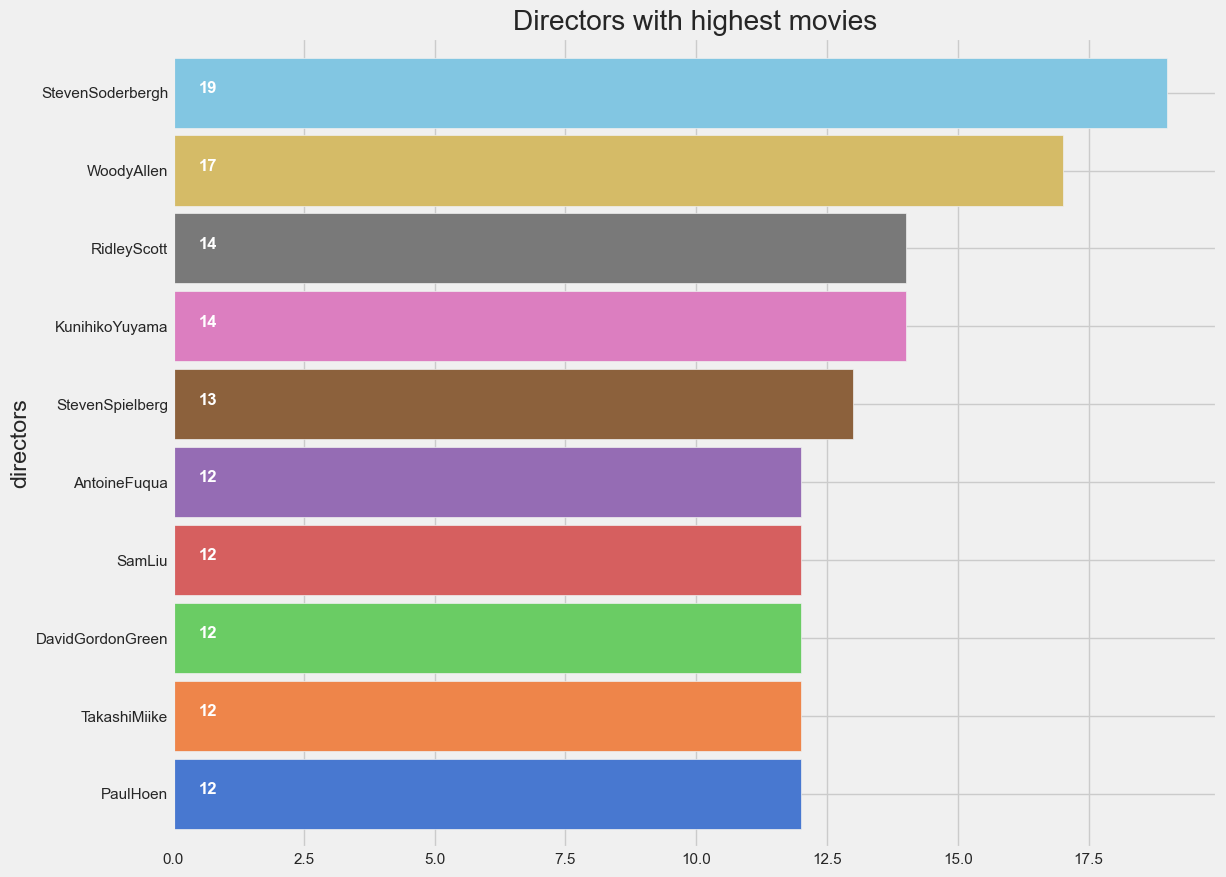

In [79]:
plt.subplots(figsize=(12,10))
filtered_movies = movies2[(movies2['directors'] != '') & (~movies2['directors'].apply(lambda x: 'Unknown' in x))]
ax = filtered_movies.explode('directors')['directors'].value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(filtered_movies.explode('directors')['directors'].value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

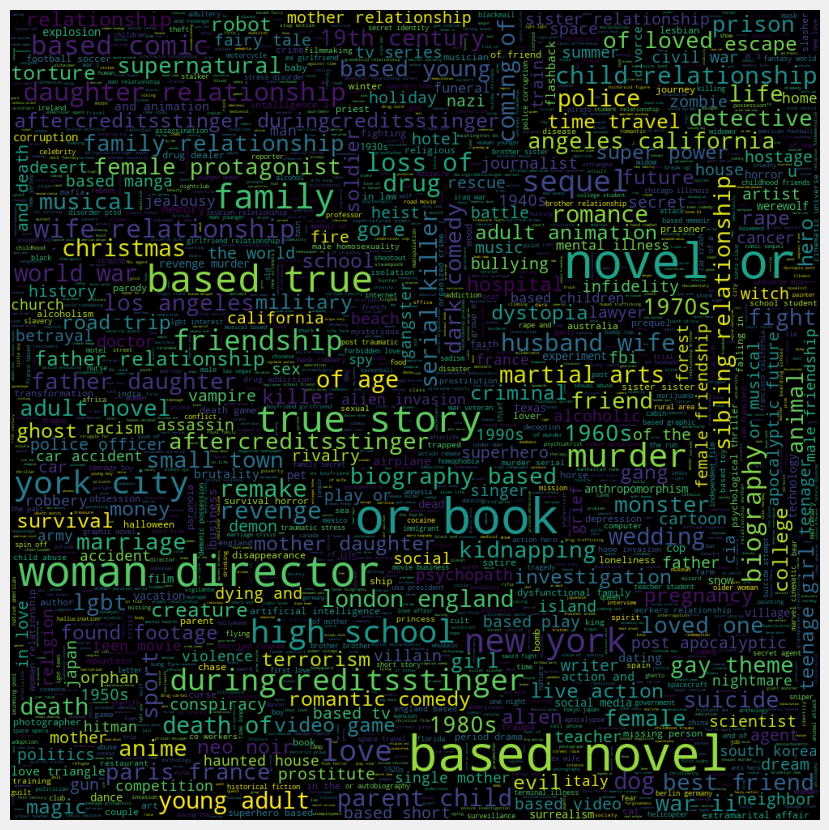

In [80]:
plt.subplots(figsize=(12,12))


words=movies2['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=stop_words, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

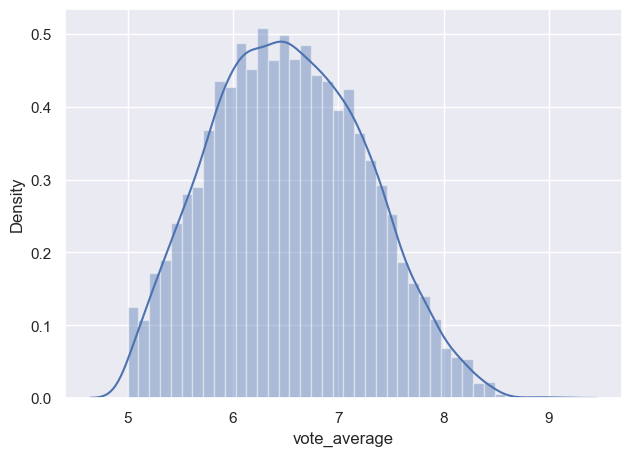

In [81]:
sns.set(color_codes=True)
sns.distplot(movies["vote_average"], );



In [82]:
liste_title = movies['title'].tolist()

In [83]:
random_title_choice = np.random.choice(liste_title)
#random_title_choice = 'Babysitting 2'
print(random_title_choice)

Shaolin Basket


In [84]:
row = movies[movies['title'] == random_title_choice]
print(row.index[0])


5175


In [85]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''




In [86]:
features = ['actors', 'keywords', 'directors', 'genres', 'production_company']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

In [87]:
def create_mix(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['actors']) + ' ' + x['directors'] + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['production_company'])
movies['mixed'] = movies.apply(create_mix, axis=1)



In [88]:
movies['popularity_log'] = np.log1p(movies['popularity'])

In [89]:
count = CountVectorizer(stop_words=list(stop_words))
count_matrix = count.fit_transform(movies['mixed'])



In [90]:
scaler = StandardScaler()
#numerical_columns = ['imbd_score', 'popularity_log', 'vote_average']
numerical_columns = ['imbd_score', 'vote_average']
numerical_features = scaler.fit_transform(movies[numerical_columns])



In [91]:
# Concatenate text and numerical features
combined_features = pd.DataFrame(count_matrix.toarray(), columns=count.get_feature_names_out())
combined_features[numerical_columns] = numerical_features

In [92]:
cosine_sim2 = cosine_similarity(combined_features, combined_features)

In [93]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

In [94]:
average_cosine_sim = (cosine_sim + cosine_sim2) / 2
get_recommendations("The Dark Knight Rises", average_cosine_sim)



(46          The Dark Knight : Le Chevalier noir
 93                                Batman Begins
 6277                                 The Batman
 4661    Batman : The Long Halloween 1ère Partie
 5100                                      Joker
 302                                 Le Prestige
 8092                       Lego Batman, le film
 5999                                Oppenheimer
 7328                               Interstellar
 7545                                  Inception
 Name: title, dtype: object,
 46         155
 93         272
 6277    414906
 4661    736073
 5100    475557
 302       1124
 8092    324849
 5999    872585
 7328    157336
 7545     27205
 Name: id, dtype: int32)

In [95]:
get_recommendations("The Dark Knight Rises", cosine_sim2)



(93                            Batman Begins
 5999                            Oppenheimer
 302                             Le Prestige
 7545                              Inception
 7328                           Interstellar
 4351                              Dunkerque
 46      The Dark Knight : Le Chevalier noir
 6058                                  Tenet
 3406                             Your Name.
 1301                    Le Château ambulant
 Name: title, dtype: object,
 93         272
 5999    872585
 302       1124
 7545     27205
 7328    157336
 4351    374720
 46         155
 6058    577922
 3406    372058
 1301      4935
 Name: id, dtype: int32)

In [96]:
get_recommendations("The Dark Knight Rises")



(4661            Batman : The Long Halloween 1ère Partie
 46                  The Dark Knight : Le Chevalier noir
 6277                                         The Batman
 8092                               Lego Batman, le film
 7424                                   Batman vs. Robin
 5988    Batman: La Malédiction Qui s'abattit sur Gotham
 4662            Batman : The Long Halloween 2ème Partie
 93                                        Batman Begins
 3191                    La Ligue des Justiciers : Échec
 5100                                              Joker
 Name: title, dtype: object,
 4661     736073
 46          155
 6277     414906
 8092     324849
 7424     321528
 5988    1003579
 4662     736074
 93          272
 3191      76589
 5100     475557
 Name: id, dtype: int32)